# ЗАДАНИЕ 3. СГЛАЖИВАНИЕ ВРЕМЕННОГО РЯДА НА ОСНОВЕ СКОЛЬЗЯЩИХ СРЕДНИХ

In [95]:
import os
import pandas as pd 
from matplotlib import pyplot as plt
from math import sqrt
from numpy import mean
from sklearn.metrics import mean_squared_error
import numpy as np
from pandas import DataFrame
from pandas import concat

In [96]:
os.chdir("C:/Users/HP/Documents/analysis/TS/data/")

In [97]:
data = pd.read_excel('data.xls', sheet_name='Material 1')
data.head()

,Unnamed: 0,Unnamed: 1,Рыночные цены на материал 1 (руб.),Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49
0,NaN,NaN,2007-01-01 00:00:00,2007-02-01 00:00:00,2007-03-01 00:00:00,2007-04-01 00:00:00,2007-05-01 00:00:00,2007-06-01 00:00:00,2007-07-01 00:00:00,2007-08-01 00:00:00,...,2010-03-01 00:00:00,2010-04-01 00:00:00,2010-05-01 00:00:00,2010-06-01 00:00:00,2010-07-01 00:00:00,2010-08-01 00:00:00,2010-09-01 00:00:00,2010-10-01 00:00:00,2010-11-01 00:00:00,2010-12-01 00:00:00
1,№ организации,1.0,26.45,23.89,25.95,30.03,28.96,25.58,25.96,30.56,...,37.36,39.21,39.43,43.5,40.75,42.84,38.01,45.18,42.49,44.2
2,NaN,2.0,26.09,20.66,22.6,25.05,27.59,20.49,27.39,28.52,...,39.54,42.38,37.5,41.29,44.96,45.39,42.49,45.77,46.94,40.83
3,NaN,3.0,22.05,23.15,28.22,21.55,21.57,28.58,31.42,28.11,...,40.17,47.99,47.92,46.25,47.3,48.9,51.2,43.96,49.22,51.38
4,NaN,4.0,20.41,28.39,17.74,18.46,20.47,28.93,27.89,20.68,...,68.39,73.93,63.97,75.59,70.98,78.28,78.98,71.27,81.34,85.73


In [98]:
dates = data.loc[data.index == 0].values[0, 2:]
val = data.loc[data.index == 1].values[0, 2:]

In [99]:
data={"Date": dates, "Value": val}

In [100]:
my_data = pd.DataFrame(data)
my_data.head()

,Date,Value
0,2007-01-01,26.45
1,2007-02-01,23.89
2,2007-03-01,25.95
3,2007-04-01,30.03
4,2007-05-01,28.96


In [101]:
my_data=my_data.set_index('Date')
my_data.head()

,Value
Date,
2007-01-01,26.45
2007-02-01,23.89
2007-03-01,25.95
2007-04-01,30.03
2007-05-01,28.96


In [102]:
series=my_data.squeeze()
type(series)

pandas.core.series.Series

## Простая скользящая средняя с фиксированным окном

Пусть размер окна равен 3, преобразованное значение в момент времени (t) вычисляется как среднее значение для предыдущих 3 наблюдений (t-2, t-1, t): obs(t) =1/3*(obs(t - 2) + obs(t - 1) + obs(t))

Date
2007-01-01          NaN
2007-02-01          NaN
2007-03-01    25.430000
2007-04-01    26.623333
2007-05-01    28.313333
2007-06-01    28.190000
2007-07-01    26.833333
2007-08-01    27.366667
2007-09-01    28.730000
2007-10-01    30.230000
Name: Value, dtype: float64


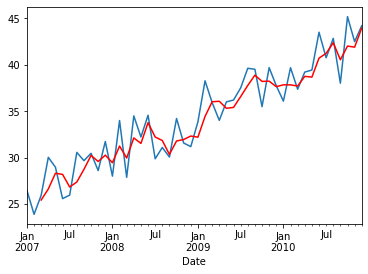

In [103]:
# moving average smoothing as data preparation
# tail-rolling average transform
rolling = series.rolling(window=3)
rolling_mean = rolling.mean()
print(rolling_mean.head(10))
# plot original and transformed dataset
series.plot()
rolling_mean.plot(color='red')
plt.show()

Date
2007-01-01       NaN
2007-02-01       NaN
2007-03-01       NaN
2007-04-01       NaN
2007-05-01    27.056
2007-06-01    26.882
2007-07-01    27.296
2007-08-01    28.218
2007-09-01    28.146
2007-10-01    28.446
Name: Value, dtype: float64


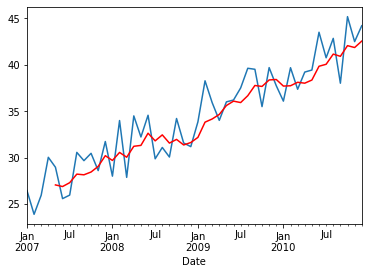

In [104]:
# moving average smoothing as data preparation
# tail-rolling average transform
rolling = series.rolling(window=5)
rolling_mean = rolling.mean()
print(rolling_mean.head(10))
# plot original and transformed dataset
series.plot()
rolling_mean.plot(color='red')
plt.show()

predicted=27.056000, expected=25.580000
predicted=26.882000, expected=25.960000
predicted=27.296000, expected=30.560000
predicted=28.218000, expected=29.670000
predicted=28.146000, expected=30.460000
predicted=28.446000, expected=28.600000
predicted=29.050000, expected=31.730000
predicted=30.204000, expected=28.000000
predicted=29.692000, expected=33.990000
predicted=30.556000, expected=27.870000
predicted=30.038000, expected=34.490000
predicted=31.216000, expected=32.220000
predicted=31.314000, expected=34.560000
predicted=32.626000, expected=29.870000
predicted=31.802000, expected=31.090000
predicted=32.446000, expected=30.060000
predicted=31.560000, expected=34.210000
predicted=31.958000, expected=31.570000
predicted=31.360000, expected=31.180000
predicted=31.622000, expected=33.850000
predicted=32.174000, expected=38.270000
predicted=33.816000, expected=35.920000
predicted=34.158000, expected=34.010000
predicted=34.646000, expected=36.000000
predicted=35.610000, expected=36.200000


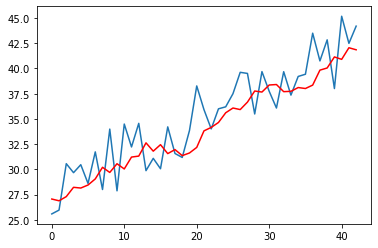

In [105]:
# moving average smoothing as a forecast model
# prepare situation
X = series.values
window = 5
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = list()
# walk forward over time steps in test
for t in range(len(test)):
	length = len(history)
	yhat = mean([history[i] for i in range(length-window,length)])
	obs = test[t]
	predictions.append(yhat)
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

## Расширяющееся окно

Date
2007-01-01    26.450000
2007-02-01    25.170000
2007-03-01    25.430000
2007-04-01    26.580000
2007-05-01    27.056000
2007-06-01    26.810000
2007-07-01    26.688571
2007-08-01    27.172500
2007-09-01    27.450000
2007-10-01    27.751000
Name: Value, dtype: float64


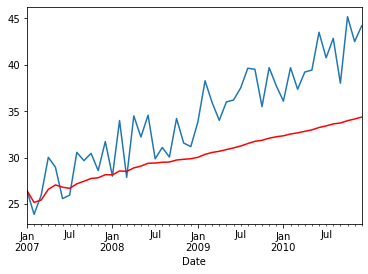

In [106]:
# tail-expanding average transform
expanding = series.expanding()
expanding_mean = expanding.mean()
print(expanding_mean.head(10))
# plot original and transformed dataset
series.plot()
expanding_mean.plot(color='red')
plt.show()

## Взвешенная скользящая средняя с фиксированным окном

### Веса в линейно возрастающем порядке

In [107]:
weights=np.arange(1,6)
weights

array([1, 2, 3, 4, 5])

In [108]:
wma51=series.rolling(5).apply(lambda series: np.dot(series,weights)/weights.sum(),raw=True)
wma51.head(10)

Date
2007-01-01          NaN
2007-02-01          NaN
2007-03-01          NaN
2007-04-01          NaN
2007-05-01    27.800000
2007-06-01    27.308000
2007-07-01    27.000667
2007-08-01    28.088667
2007-09-01    28.572667
2007-10-01    29.344000
Name: Value, dtype: float64

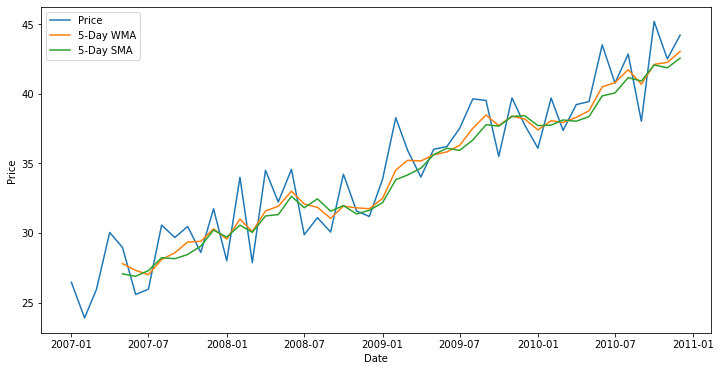

In [109]:
sma5 = series.rolling(5).mean()

plt.figure(figsize = (12,6))

plt.plot(series, label="Price")
plt.plot(wma51, label="5-Day WMA")
plt.plot(sma5, label="5-Day SMA")

plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()

plt.show()

### Веса для сглаживания по полиномам 2-го или 3-го порядка (см. учебник Дубровой)

In [110]:
weights=np.array([-3/35,12/35,17/35,12/35,-3/35])
weights

array([-0.08571429,  0.34285714,  0.48571429,  0.34285714, -0.08571429])

In [111]:
wma52=series.rolling(5).apply(lambda series: np.sum(weights*series),raw=True)
wma52.head(10)

Date
2007-01-01          NaN
2007-02-01          NaN
2007-03-01          NaN
2007-04-01          NaN
2007-05-01    26.341714
2007-06-01    29.172000
2007-07-01    28.683143
2007-08-01    26.060857
2007-09-01    26.831714
2007-10-01    29.113143
Name: Value, dtype: float64

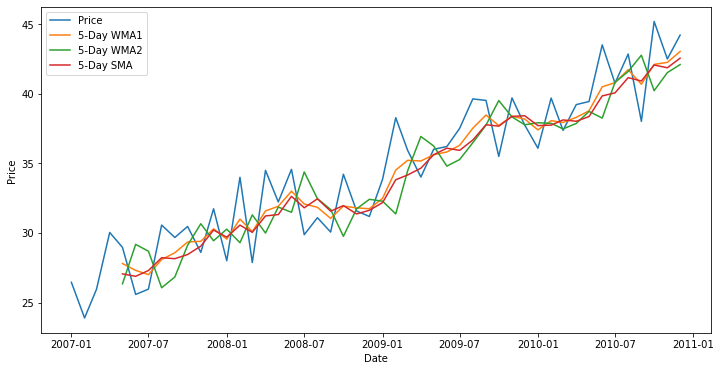

In [112]:
sma5 = series.rolling(5).mean()

plt.figure(figsize = (12,6))

plt.plot(series, label="Price")
plt.plot(wma51, label="5-Day WMA1")
plt.plot(wma52, label="5-Day WMA2")
plt.plot(sma5, label="5-Day SMA")

plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()

plt.show()

predicted=26.341714, expected=25.580000
predicted=26.416286, expected=25.960000
predicted=27.126000, expected=30.560000
predicted=29.365143, expected=29.670000
predicted=29.241714, expected=30.460000
predicted=29.113143, expected=28.600000
predicted=28.854286, expected=31.730000
predicted=30.832571, expected=28.000000
predicted=29.589143, expected=33.990000
predicted=31.070286, expected=27.870000
predicted=31.292286, expected=34.490000
predicted=30.787429, expected=32.220000
predicted=30.955429, expected=34.560000
predicted=34.141714, expected=29.870000
predicted=32.729143, expected=31.090000
predicted=32.453143, expected=30.060000
predicted=32.832857, expected=34.210000
predicted=33.515143, expected=31.570000
predicted=32.062857, expected=31.180000
predicted=32.512000, expected=33.850000
predicted=32.275429, expected=38.270000
predicted=31.571714, expected=35.920000
predicted=32.158000, expected=34.010000
predicted=33.343143, expected=36.000000
predicted=34.995714, expected=36.200000


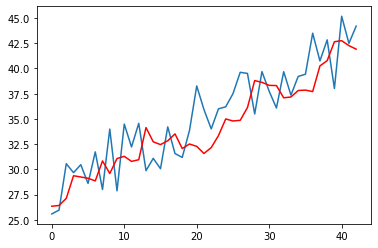

In [85]:
# moving weighted average smoothing as a forecast model
# prepare situation
X = series.values
weights=[-3/35,12/35,17/35,12/35,-3/35]*10
window = 5
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = list()
# walk forward over time steps in test
for t in range(len(test)):
	length = len(history)
	yhat = np.sum([history[i]*weights[i] for i in range(length-window,length)])
	obs = test[t]
	predictions.append(yhat)
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

## Basic Feature Engineering

In [90]:
# create a rolling mean feature
shifted = my_data.shift(1)
window = shifted.rolling(window=2)
means = window.mean()
dataframe = concat([means, my_data], axis=1)
dataframe.columns = ['mean(t-1,t)', 't+1']
print(dataframe.head(5))

            mean(t-1,t)    t+1
Date                          
2007-01-01          NaN  26.45
2007-02-01          NaN  23.89
2007-03-01        25.17  25.95
2007-04-01        24.92  30.03
2007-05-01        27.99  28.96


In [91]:
# create rolling statistics features
width = 3
shifted = my_data.shift(width - 2)
window = shifted.rolling(window=width)
dataframe = concat([window.min(), window.mean(), window.max(), my_data], axis=1)
dataframe.columns = ['min', 'mean', 'max', 't+1']
print(dataframe.head(5))

              min       mean    max    t+1
Date                                      
2007-01-01    NaN        NaN    NaN  26.45
2007-02-01    NaN        NaN    NaN  23.89
2007-03-01    NaN        NaN    NaN  25.95
2007-04-01  23.89  25.430000  26.45  30.03
2007-05-01  23.89  26.623333  30.03  28.96


In [92]:
# create expanding window features
window = my_data.expanding()
dataframe = concat([window.min(), window.mean(), window.max(), my_data], axis=1)
dataframe.columns = ['min', 'mean', 'max', 't+1']
print(dataframe.head(5))

              min    mean    max    t+1
Date                                   
2007-01-01  26.45  26.450  26.45  26.45
2007-02-01  23.89  25.170  26.45  23.89
2007-03-01  23.89  25.430  26.45  25.95
2007-04-01  23.89  26.580  30.03  30.03
2007-05-01  23.89  27.056  30.03  28.96
